# Tutorial1: My first accelerator, a FODO cell.

# Objectives
- Define a simple lattice.
- Compute the optics using the TWISS MAD-X engine.

# Python libraries 

In [1]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

# Launching MAD-X

In [2]:
# myMad = Madx(stdout=True)
madx = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.11.17 14:28:31      +
  ++++++++++++++++++++++++++++++++++++++++++++


# Solutions

#### 1. Define the .madx input file for a FODO cell with the following characteristics:
 - Length of the cell, Lcell = 100 m.
 - Two quadrupoles, one focusing (FQ) and another one defocusing (DQ) of 5 m long (Lq).
 - Put the start of the first quadrupole at the start of the sequence.
 - Each quadrupole has a focal length f = 200 m. (HINT: k1 x Lq= 1/f). 
 
<div>
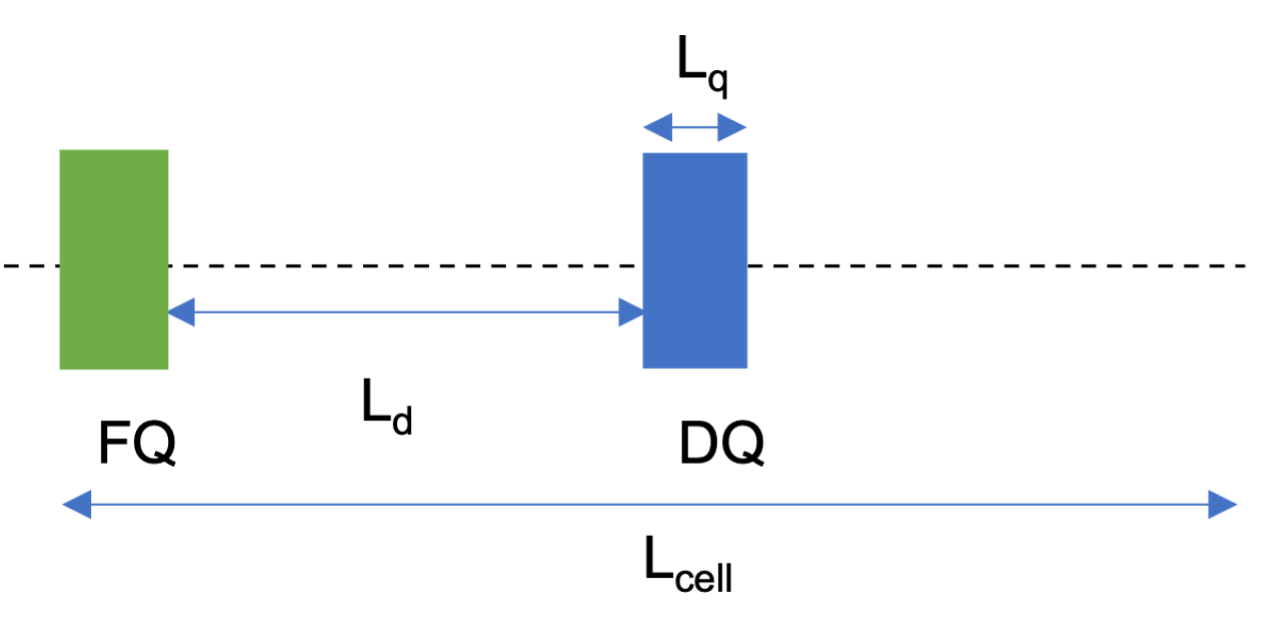
</div>

#### 2. Define a proton beam with $E_{tot}$ = 2 GeV. Activate the sequence and try to find the periodic solution with the TWISS MAD-X function. Then, plot the $\beta$-functions. If you found $\beta_{max}$ = 460 m you succeeded!

In [3]:
madx.call('tutorial1.madx');

! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;

quadrupoleLenght=5;

f=200;

myK:=1/f/quadrupoleLenght;// m^-2



! *********************************************************************

! Definition of magnets

! ********************************************************************* 

QF: quadrupole, L=quadrupoleLenght, K1:=myK;

QD: quadrupole, L=quadrupoleLenght, K1:=-myK;



! *********************************************************************

! Definition of sequence

! *********************************************************************

myCell:sequence, refer=entry, L=L_CELL;

quadrupole1: QF, at=0;

marker1: marker, at=25;

quadrupole2: QD, at=50;

marker2: marker, at=75;

endsequence;



! *********************************************************************

! Definition of beam

! *****************************************************

#### Accessing the MAD-X output data with python-cpymad functions

In [4]:
myDF=madx.table.twiss.dframe()
myDF[['name','keyword','s','betx','bety','alfx','alfy','mux','muy','dx','dy','x','y']]

,name,keyword,s,betx,bety,alfx,alfy,mux,muy,dx,dy,x,y
#s,mycell$start:1,marker,0.0,463.623288,369.779162,-1.156109,0.929316,0.000000,0.000000,0.0,0.0,0.0,0.0
quadrupole1,quadrupole1:1,quadrupole,5.0,463.623288,369.779162,1.156109,-0.929316,0.001709,0.002161,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,25.0,419.394867,408.967742,1.055312,-1.030113,0.008930,0.010350,0.0,0.0,0.0,0.0
marker1,marker1:1,marker,25.0,419.394867,408.967742,1.055312,-1.030113,0.008930,0.010350,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,50.0,369.779162,463.623288,0.929316,-1.156109,0.019041,0.019493,0.0,0.0,0.0,0.0
quadrupole2,quadrupole2:1,quadrupole,55.0,369.779162,463.623288,-0.929316,1.156109,0.021202,0.021202,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,75.0,408.967742,419.394867,-1.030113,1.055312,0.029391,0.028423,0.0,0.0,0.0,0.0
marker2,marker2:1,marker,75.0,408.967742,419.394867,-1.030113,1.055312,0.029391,0.028423,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,100.0,463.623288,369.779162,-1.156109,0.929316,0.038533,0.038533,0.0,0.0,0.0,0.0
#e,mycell$end:1,marker,100.0,463.623288,369.779162,-1.156109,0.929316,0.038533,0.038533,0.0,0.0,0.0,0.0


In [5]:
myDF_summ=madx.table.summ.dframe()
myDF_summ

,length,orbit5,alfa,gammatr,q1,dq1,betxmax,dxmax,dxrms,xcomax,...,ycorms,deltap,synch_1,synch_2,synch_3,synch_4,synch_5,synch_6,synch_8,nflips
#e,100.0,-0.0,0.0,0.0,0.038533,-0.043847,463.623288,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Extracting data from the SUMM and TWISS tables

In [6]:
# From the SUMM table
print("Horizontal betamax: %s" %myDF_summ["betxmax"].values[0])
print("Vertical betamax: %s" %myDF_summ["betymax"].values[0])

Horizontal betamax: 463.62328830783895
Vertical betamax: 463.6232883078387


In [7]:
# From the TWISS table
betxmax=max(myDF["betx"])
print("Horizontal betamax")
print(betxmax)

betymax=max(myDF["bety"])
print("Vertical betamax")
print(betymax)

Horizontal betamax
463.62328830783895
Vertical betamax
463.6232883078387


#### Plotting results

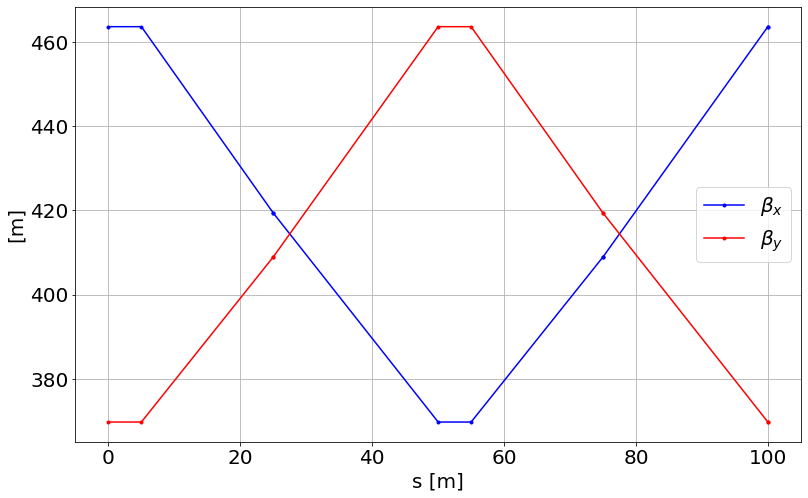

In [8]:
fig = plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 20})
plt.plot(myDF['s'],myDF['betx'],'.-b',label='$\\beta_x$')
plt.plot(myDF['s'],myDF['bety'],'.-r',label='$\\beta_y$')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.legend()
plt.grid()

**If you found $\beta_{max}$= 463.6 m you succeded!**

#### 3. Using the plot you obtained can you estimate the phase advance of the cell. Compare with the tunes obtained with the TWISS.

For the phase advance one can consider the definition

\begin{equation}
\mu=\int\frac{1}{\beta(s)}ds.
\end{equation}

Remember the phase advance in MAD-X is given in units of [2$\pi$].

In [9]:
# A very basic approximation considering a constant beta
# The mean beta value is 
1/417.*100/2/np.pi

0.03816665301963917

In [10]:
# Computing the integral
np.trapz(1/myDF['betx'],myDF['s'])/2/np.pi

0.038571104937361426

In [11]:
# Correct values from MAD-X TWISS commands
myDF.iloc[-1]['mux']

0.03853349450910022

In [12]:
# Phase Advance in units of degrees
myDF.iloc[-1]['mux']*2*180

13.87205802327608

#### 4. Try with $E_{tot}$ = 0.7 GeV: what is the MAD-X error message? Try with f = 20 m: what is the MAD-X error message? (Note that the error messages will appear in the terminal from which you launched the JupyterLab).

In [13]:
myString='''
beam, particle=proton, energy=0.7;
'''
madx.input(myString);

RuntimeError: MAD-X has stopped working!

There is an error due to the fact that the total energy is lower than the rest proton mass.

In [14]:
# Because the MADX process was crashed in last cell we need to instanciate another MADX process. 
# Then we need to run the call command again to run the FODO input file.
# Finally we can send the commands to change the focal lenght and TWISS again.
madx=Madx()
madx.call('Tutorial1_solution.madx')
myString='''
f=20;
use,sequence=myCell;      
twiss,sequence=myCell;
'''
madx.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.11.17 14:28:57      +
  ++++++++++++++++++++++++++++++++++++++++++++
! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;

quadrupoleLenght=5;

f=200;

myK:=1/f/quadrupoleLenght;// m^-2



! *********************************************************************

! Definition of magnets

! ********************************************************************* 

QF: quadrupole, L=quadrupoleLenght, K1:=myK;

QD: quadrupole, L=quadrupoleLenght, K1:=-myK;



! *********************************************************************

! Definition of sequence

! *********************************************************************

myCell:sequence, refer=

**INTERPRETATION**: The cell is unstable due to the fact that the focal length is too short. Please note the value of the cosmux and cosmuy. **REMEMBER** |Trace(M)|< 2; -1 <= cos $\mu$ <= 1

# EXTRA

# Adding markers

This is an example to add markers in the sequence using macros.


In [15]:
madx=Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2022.11.17 14:29:06      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [16]:
madx.call("Tutorial1_solution_adding_markers.madx")

! *********************************************************************

! Definition of parameters

! *********************************************************************



option, echo=false, info=false, warn=false;

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0   -1.665334537e-16       -77490641.39 

                q1                dq1            betxmax              dxmax 
     0.03853349451     -0.04384718845        463.6232883                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0      0.03853349451 

               dq2            betymax              dymax              dyrms 
    -0.04384718845        463.6232883     

In [17]:
myDF=madx.table.twiss.dframe()
myDF.head()

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.0,463.623288,-1.156109,0.000000,369.779162,0.929316,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1,quadrupole1:1,quadrupole,5.0,463.623288,1.156109,0.001709,369.779162,-0.929316,0.002161,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,6.0,461.316110,1.151069,0.002053,371.642834,-0.934356,0.002590,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
marker6,marker6:1,marker,6.0,461.316110,1.151069,0.002053,371.642834,-0.934356,0.002590,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,7.0,459.019012,1.146029,0.002399,373.516585,-0.939396,0.003018,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


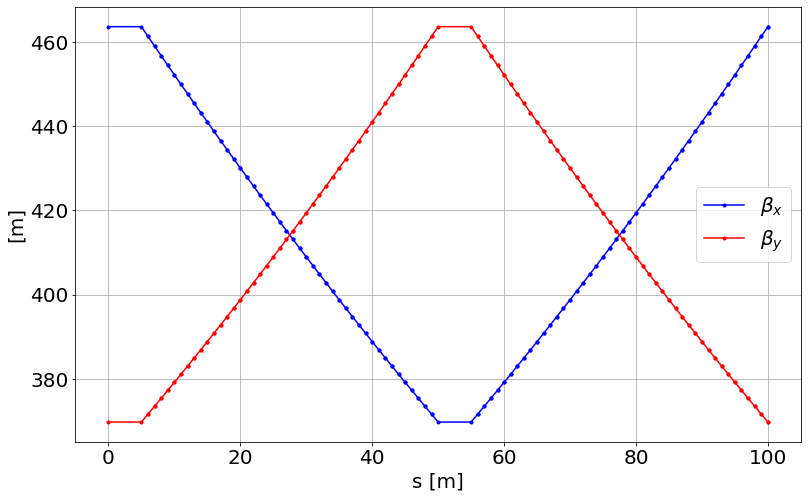

In [19]:
fig = plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 20})
plt.plot(myDF['s'],myDF['betx'],'.-b',label='$\\beta_x$')
plt.plot(myDF['s'],myDF['bety'],'.-r',label='$\\beta_y$')
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.legend(loc='best')
plt.grid()